In [ ]:
!pip install google-play-scraper

In [ ]:
import pandas as pd
import numpy as np
from google_play_scraper import Sort, reviews
from google_play_scraper import app

In [ ]:
result, continuation_token = reviews(
	'com.twitter.android',
	lang='id', #bahasa
	country='id', #negara
	sort=Sort.MOST_RELEVANT, #sorting yg paling relevan
 	count=1000, #jumlah dataset
	filter_score_with= None #isi dengan 1, 2, 3, 4, 5 None jika ingin bercampur
)

In [ ]:
data = pd.DataFrame(np.array(result),columns=['review'])
data = data.join(pd.DataFrame(data.pop('review').tolist()))
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,c795bb54-dd6b-4094-bfa6-31a8ad60b8a2,Royhan Ainur Ridlo,https://play-lh.googleusercontent.com/a-/ALV-U...,"Ada bug yang menggangu, dimana terkadang posti...",1,7385,10.39.0-release.0,2024-05-07 09:40:33,None,None,10.39.0-release.0
1,94a3c4dc-a217-4209-8546-a65efeaeec01,Abduh Muhammad,https://play-lh.googleusercontent.com/a-/ALV-U...,"Semenjak berubah jd X, kok sepertinya makin ba...",2,1273,10.42.0-release.0,2024-05-23 02:43:30,None,None,10.42.0-release.0
2,899d3dab-c831-4a49-82f6-97bce47a0844,Dimas Dwi putra,https://play-lh.googleusercontent.com/a/ACg8oc...,X sedang eror atau lagi nge bug?? Di lihat sin...,1,1875,10.39.0-release.0,2024-05-01 14:12:55,None,None,10.39.0-release.0
3,ec5c58a6-34e9-4554-bf9d-88210a96176d,dearestone_woo,https://play-lh.googleusercontent.com/a-/ALV-U...,"gak tau, tapi sering banget ke logout.. saking...",3,859,10.39.0-release.0,2024-05-31 23:22:40,None,None,10.39.0-release.0
4,71d2334f-7cfb-478e-b40f-33113305ba35,Raisha Thahira,https://play-lh.googleusercontent.com/a-/ALV-U...,X ini beneran aplikasi yang jelek banget. Hanc...,1,877,10.38.0-release.0,2024-04-29 08:09:27,None,None,10.38.0-release.0


In [ ]:
len(data)

1000

In [ ]:
data = data[['content','score']]
data.head()

,content,score
0,"Ada bug yang menggangu, dimana terkadang posti...",1
1,"Semenjak berubah jd X, kok sepertinya makin ba...",2
2,X sedang eror atau lagi nge bug?? Di lihat sin...,1
3,"gak tau, tapi sering banget ke logout.. saking...",3
4,X ini beneran aplikasi yang jelek banget. Hanc...,1


In [ ]:
data = data.rename(columns={'content': 'ulasan', 'score': 'nilai'})
data.head()

,ulasan,nilai
0,"Ada bug yang menggangu, dimana terkadang posti...",1
1,"Semenjak berubah jd X, kok sepertinya makin ba...",2
2,X sedang eror atau lagi nge bug?? Di lihat sin...,1
3,"gak tau, tapi sering banget ke logout.. saking...",3
4,X ini beneran aplikasi yang jelek banget. Hanc...,1


In [ ]:
data.to_csv("komentar aplikasi X 1000 Data.csv", index = False , encoding='utf-8')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("komentar aplikasi X 1000 Data.csv")
df.head(10)

,ulasan,nilai
0,"Ada bug yang menggangu, dimana terkadang posti...",1
1,"Semenjak berubah jd X, kok sepertinya makin ba...",2
2,X sedang eror atau lagi nge bug?? Di lihat sin...,1
3,"gak tau, tapi sering banget ke logout.. saking...",3
4,X ini beneran aplikasi yang jelek banget. Hanc...,1
5,"Banyak bug, susah loading video dan foto padah...",1
6,Aplikasi nya tidak bisa digunakan. Internet da...,1
7,"Aplikasi cacat banyk bug nya, gak di apaa²in a...",1
8,"Namanya jelekkkk, bikin orang ngiranya aplikas...",1
9,"Akunku kena hack, udah hubungi bantuan tidak m...",1


**Mengolah Data Hasil Scraping**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

#set warning
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns', None)

In [ ]:
filename = "komentar aplikasi X 1000 Data.csv"
df = pd.read_csv(filename, encoding = 'latin-1')
df.head()

,ulasan,nilai
0,"Ada bug yang menggangu, dimana terkadang posti...",1
1,"Semenjak berubah jd X, kok sepertinya makin ba...",2
2,X sedang eror atau lagi nge bug?? Di lihat sin...,1
3,"gak tau, tapi sering banget ke logout.. saking...",3
4,X ini beneran aplikasi yang jelek banget. Hanc...,1


In [ ]:
df.columns = ['ulasan', 'nilai']
df.head()

,ulasan,nilai
0,"Ada bug yang menggangu, dimana terkadang posti...",1
1,"Semenjak berubah jd X, kok sepertinya makin ba...",2
2,X sedang eror atau lagi nge bug?? Di lihat sin...,1
3,"gak tau, tapi sering banget ke logout.. saking...",3
4,X ini beneran aplikasi yang jelek banget. Hanc...,1


**#Data Cleaning**

In [ ]:
import string
import re

In [ ]:
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
df['cleaned_text'] = df['ulasan'].apply(lambda x: clean_text(x))
df['label'] = df['nilai'].map({1.0:0, 2.0:0, 3.0:0, 4.0:1, 5.0:1})

In [ ]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
df['ulasan_len'] = df['ulasan'].apply(lambda x: len(x) - x.count(" "))
df['punct'] = df['ulasan'].apply(lambda x: count_punct(x))
df.head()

,ulasan,nilai,cleaned_text,label,ulasan_len,punct
0,"Ada bug yang menggangu, dimana terkadang posti...",1,ada bug yang menggangu dimana terkadang posti...,0,273,2.9
1,"Semenjak berubah jd X, kok sepertinya makin ba...",2,semenjak berubah jd x kok sepertinya makin ba...,0,261,5.4
2,X sedang eror atau lagi nge bug?? Di lihat sin...,1,x sedang eror atau lagi nge bug di lihat sin...,0,201,4.5
3,"gak tau, tapi sering banget ke logout.. saking...",3,gak tau tapi sering banget ke logout saking...,0,278,7.2
4,X ini beneran aplikasi yang jelek banget. Hanc...,1,x ini beneran aplikasi yang jelek banget hanc...,0,204,4.9


**Tokenizing**

In [ ]:
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text
df['tokens'] = df['cleaned_text'].apply(lambda x: tokenize_text(x))
df.head()

,ulasan,nilai,cleaned_text,label,ulasan_len,punct,tokens
0,"Ada bug yang menggangu, dimana terkadang posti...",1,ada bug yang menggangu dimana terkadang posti...,0,273,2.9,"[ada, bug, yang, menggangu, dimana, terkadang,..."
1,"Semenjak berubah jd X, kok sepertinya makin ba...",2,semenjak berubah jd x kok sepertinya makin ba...,0,261,5.4,"[semenjak, berubah, jd, x, kok, sepertinya, ma..."
2,X sedang eror atau lagi nge bug?? Di lihat sin...,1,x sedang eror atau lagi nge bug di lihat sin...,0,201,4.5,"[x, sedang, eror, atau, lagi, nge, bug, di, li..."
3,"gak tau, tapi sering banget ke logout.. saking...",3,gak tau tapi sering banget ke logout saking...,0,278,7.2,"[gak, tau, tapi, sering, banget, ke, logout, s..."
4,X ini beneran aplikasi yang jelek banget. Hanc...,1,x ini beneran aplikasi yang jelek banget hanc...,0,204,4.9,"[x, ini, beneran, aplikasi, yang, jelek, bange..."


**Stopwords**

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Lemmatization**

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_ulasan'] = df['tokens'].apply(lambda x: lemmatize_text(x))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,ulasan,nilai,cleaned_text,label,ulasan_len,punct,tokens,lemmatized_ulasan
0,"Ada bug yang menggangu, dimana terkadang posti...",1,ada bug yang menggangu dimana terkadang posti...,0,273,2.9,"[ada, bug, yang, menggangu, dimana, terkadang,...",bug menggangu dimana terkadang postingan foto ...
1,"Semenjak berubah jd X, kok sepertinya makin ba...",2,semenjak berubah jd x kok sepertinya makin ba...,0,261,5.4,"[semenjak, berubah, jd, x, kok, sepertinya, ma...",semenjak berubah jd x bug nya ya bgt gk update...
2,X sedang eror atau lagi nge bug?? Di lihat sin...,1,x sedang eror atau lagi nge bug di lihat sin...,0,201,4.5,"[x, sedang, eror, atau, lagi, nge, bug, di, li...",x eror nge bug lihat sinyal ajaa buka aplikasi...
3,"gak tau, tapi sering banget ke logout.. saking...",3,gak tau tapi sering banget ke logout saking...,0,278,7.2,"[gak, tau, tapi, sering, banget, ke, logout, s...",gak tau banget logout saking logout sandi samp...
4,X ini beneran aplikasi yang jelek banget. Hanc...,1,x ini beneran aplikasi yang jelek banget hanc...,0,204,4.9,"[x, ini, beneran, aplikasi, yang, jelek, bange...",x beneran aplikasi jelek banget hancur parah l...


**Exploratory Data Analysis**

In [ ]:
#Shape of the dataset, and breakdown of the classes
print(f"Input data has {len(df)} rows and {len(df.columns)} columns")
print(f"nilai 1.0 = {len(df[df['nilai']==1.0])} rows")
print(f"nilai 2.0 = {len(df[df['nilai']==2.0])} rows")
print(f"nilai 3.0 = {len(df[df['nilai']==3.0])} rows")
print(f"nilai 4.0 = {len(df[df['nilai']==4.0])} rows")
print(f"nilai 5.0 = {len(df[df['nilai']==5.0])} rows")

Input data has 1000 rows and 8 columns
nilai 1.0 = 658 rows
nilai 2.0 = 124 rows
nilai 3.0 = 105 rows
nilai 4.0 = 30 rows
nilai 5.0 = 83 rows


Number of null in label: 0
Number of null in text: 0


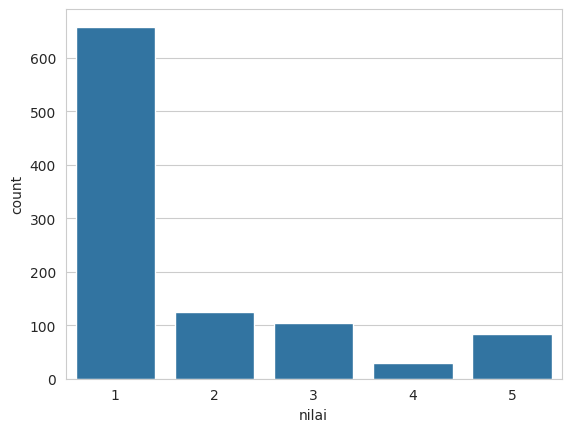

In [ ]:
# Missing values in the dataset
print(f"Number of null in label: { df['nilai'].isnull().sum() }")
print(f"Number of null in text: { df['ulasan'].isnull().sum()}")
sns.countplot(x='nilai', data=df);

**Visualisasi WordCloud**

In [ ]:
from wordcloud import WordCloud

In [ ]:
df_negative = df[ (df['nilai']==1.0) | (df['nilai']==2.0) | (df['nilai']==3.0)]
df_positive = df[ (df['nilai']==4.0) | (df['nilai']==5.0)]
#convert to list
negative_list=df_negative['lemmatized_ulasan'].tolist()
positive_list= df_positive['lemmatized_ulasan'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of spam
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of ham
filtered_positive = filtered_positive.lower()

**WordCloud** **Positif**

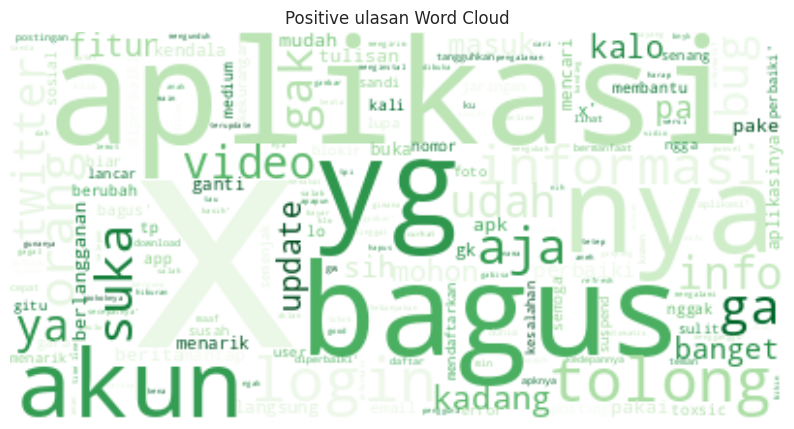

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive ulasan Word Cloud")
plt.show()

**WordCloud Negatif**

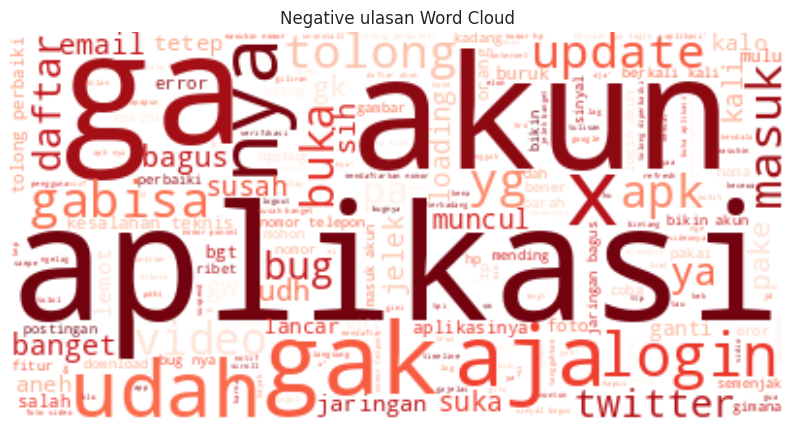

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative ulasan Word Cloud")
plt.show()

**Ekstraksi Fitur Dengan Text**

In [ ]:
X = df[['lemmatized_ulasan', 'ulasan_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(1000, 3)
(1000,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1) #membagi data testing dan data training
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(900, 3)
(100, 3)
(900,)
(100,)


**Ekstraksi Fitur Menggunakan TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 13, norm = None, smooth_idf=True) #nilai IDF
tfidf_train = tfidf.fit_transform(X_train['lemmatized_ulasan'])
tfidf_test = tfidf.transform(X_test['lemmatized_ulasan'])

X_train_vect = pd.concat([X_train[['ulasan_len', 'punct']].reset_index(drop=True),
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['ulasan_len', 'punct']].reset_index(drop=True),
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.columns = X_train_vect.columns.astype(str)
X_test_vect.columns = X_test_vect.columns.astype(str)

X_train_vect.head()

,ulasan_len,punct,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151
0,97,2.1,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,4.783718,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,3.326168,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.164448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,72,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.709161,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.421479,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.112157,0.0,0.0,0.0,0.0,0.0
2,309,1.3,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.913133,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,4.065836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,62,3.2,2.715909,0.0,0.0,0.0,3.676371,0.0,0.0,2.391859,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,3.540825,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,5.653543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,3.55501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,4.042305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.149545,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.660371,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,89,2.2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,2.89085,3.149545,0.0,0.0,0.0,0.0,0.0,0.0,3.058573,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,3.833213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.709161,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.421479,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,4.019316,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2.599499,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        90
           1       0.00      0.00      0.00        10

    accuracy                           0.90       100
   macro avg       0.45      0.50      0.47       100
weighted avg       0.81      0.90      0.85       100



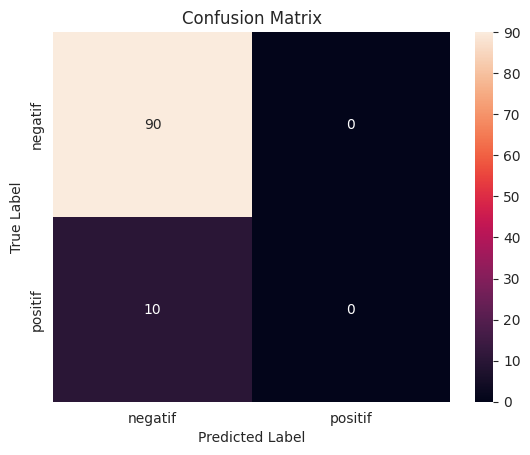

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 19) #nilai n=k
classifier.fit(X_train_vect, y_train)
knn_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["negatif", "positif"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()